In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Data Understanding
plays = pd.read_csv('..\\data\\game_plays.csv')
games = pd.read_csv('..\\data\\game.csv')
print('Plays Columns: ' ,plays.columns)
print('Games Columns: ' ,games.columns)


Plays Columns:  Index(['play_id', 'game_id', 'team_id_for', 'team_id_against', 'event',
       'secondaryType', 'x', 'y', 'period', 'periodType', 'periodTime',
       'periodTimeRemaining', 'dateTime', 'goals_away', 'goals_home',
       'description', 'st_x', 'st_y'],
      dtype='object')
Games Columns:  Index(['game_id', 'season', 'type', 'date_time_GMT', 'away_team_id',
       'home_team_id', 'away_goals', 'home_goals', 'outcome',
       'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
       'venue_time_zone_offset', 'venue_time_zone_tz'],
      dtype='object')


In [3]:
# Add additional informations per Play
plays_ext = pd.merge(plays, games[['game_id', 'season', 'type', 'away_team_id','home_team_id']], on=['game_id'], how='left')
print('Plays Columns: ' ,plays_ext.columns)

Plays Columns:  Index(['play_id', 'game_id', 'team_id_for', 'team_id_against', 'event',
       'secondaryType', 'x', 'y', 'period', 'periodType', 'periodTime',
       'periodTimeRemaining', 'dateTime', 'goals_away', 'goals_home',
       'description', 'st_x', 'st_y', 'season', 'type', 'away_team_id',
       'home_team_id'],
      dtype='object')


In [4]:
unique_events = plays_ext['event'].unique()
unique_events

array(['Game Scheduled', 'Period Ready', 'Period Start', 'Faceoff',
       'Shot', 'Goal', 'Takeaway', 'Hit', 'Stoppage', 'Blocked Shot',
       'Giveaway', 'Missed Shot', 'Penalty', 'Period End',
       'Period Official', 'Game End', 'Official Challenge',
       'Shootout Complete', 'Early Intermission Start',
       'Early Intermission End', 'Game Official', 'Emergency Goaltender'],
      dtype=object)

In [5]:
seasons = plays_ext['season'].unique()
seasons

array([20162017, 20172018, 20152016, 20142015, 20122013, 20132014,
       20112012, 20102011, 20082009, 20092010, 20072008, 20062007,
       20022003, 20032004, 20052006, 20002001, 20012002, 20192020,
       20182019], dtype=int64)

In [6]:
def plot_amount_event(data, title, xlabel, ylabel):
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    data.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

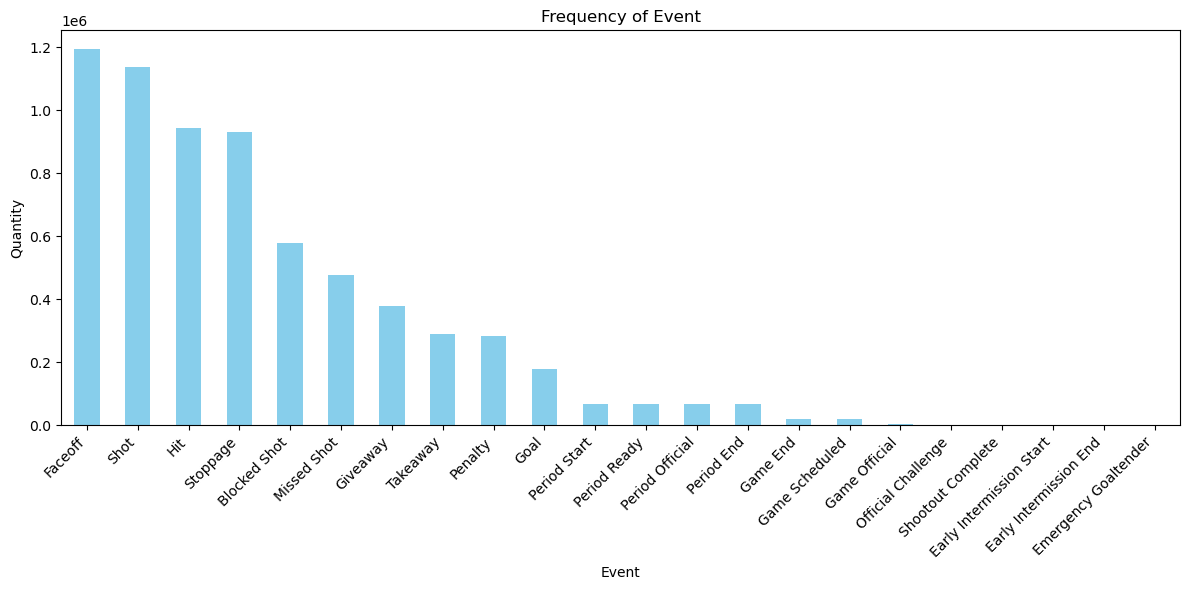

In [7]:
# Count the frequency of each event
event_counts = plays_ext['event'].value_counts()
plot_amount_event(event_counts, 'Frequency of Event', 'Event', 'Quantity')

In [8]:
# Split Events in dataframes 0> only get events that could be useful
# Get Shots
# exculde blocked shot => we do not know if the shot is going to miss the target, score or get stopped by the goaly
shots = plays_ext.loc[plays_ext['event'].isin(['Goal','Shot', 'Missed Shot'])]
print('Shots: ', len(shots))
#Get Hits
hits = plays_ext.loc[plays_ext['event'].isin(['Hit'])]
#Get Faceoffs => who faces offs against whom and who won the faceoff
faceoffs = plays_ext.loc[plays_ext['event'].isin(['Faceoff'])]
#Get Stoppage => not useful yet, its events like icing, offside
stoppages = plays_ext.loc[plays_ext['event'].isin(['Stoppage'])]
#Get Takeaways => puck gets taken by the opposite team
takeaways = plays_ext.loc[plays_ext['event'].isin(['Takeaway'])]
#Get Penalties
penalties = plays_ext.loc[plays_ext['event'].isin(['Penalty'])]

Shots:  1797912


In [9]:
faceoffs['description'].unique()

array(['Jonathan Toews faceoff won against Claude Giroux',
       'Pierre-Edouard Bellemare faceoff won against Nick Schmaltz',
       'Marcus Kruger faceoff won against Sean Couturier', ...,
       'Brayden Schenn faceoff won against Karson Kuhlman',
       'Oskar Sundqvist faceoff won against Brad Marchand',
       'Ivan Barbashev faceoff won against Brad Marchand'], dtype=object)

In [10]:
stoppages['description'].unique()

array(['Goalie Stopped', 'Icing', 'Offside', 'TV timeout',
       'Puck in Benches', 'Puck in Netting', 'Hand Pass', 'Home Timeout',
       'Puck in Crowd', 'High Stick', 'Puck Frozen',
       'Referee or Linesman', 'Player Equipment', 'Video Review',
       'Visitor Timeout', 'Official Injury',
       'Challenge Away: goalie interference', 'Net Off', 'Clock Problem',
       'Challenge Home: goalie interference', 'Challenge Away: off-side',
       'Player Injury', 'Ice Problem', 'Challenge Home: off-side',
       'Rink Repair', 'Premature Substitution', 'Objects on Ice',
       'Challenge League: off-side', 'Switch sides',
       'Goalie Puck Frozen Played Beyond Center Line',
       'Net Dislodged Offensive Skater', 'Net Dislodged by Goaltender',
       'Net Dislodged Defensive Skater', 'Skater Puck Frozen',
       'Missing key [ED_1717]', 'Missing key [ED_1718]',
       'Missing key [ED_1720]'], dtype=object)

In [11]:
penalties['secondaryType'].unique()

array(['Hooking', 'Closing hand on puck', 'Interference', 'Hi-sticking',
       'Roughing', 'Slashing', 'Holding', 'Tripping', 'Fighting',
       'Cross checking', 'Hi stick - double minor',
       'Too many men on the ice', 'Delaying Game - Puck over glass',
       'Boarding', 'Game misconduct', 'Instigator', 'Misconduct',
       'Interference - Goalkeeper', 'Kneeing',
       'PS - Tripping on breakaway', 'Delay of game', 'Holding the stick',
       'Illegal equipment', 'Unsportsmanlike conduct', 'Embellishment',
       'PS - Slash on breakaway', 'Broken stick',
       'PS - Hooking on breakaway', 'Delaying the game',
       'Instigator - Misconduct', 'Match penalty', 'Elbowing', 'Charging',
       'PS - Net displaced', 'Illegal stick',
       'Delaying Game - Illegal play by goalie', 'Illegal check to head',
       'Goalie leave crease', 'Minor', 'Bench', 'Face-off violation',
       'Delay Gm - Face-off Violation', 'Clipping', 'Abusive language',
       'Objects on ice', 'Illegal su

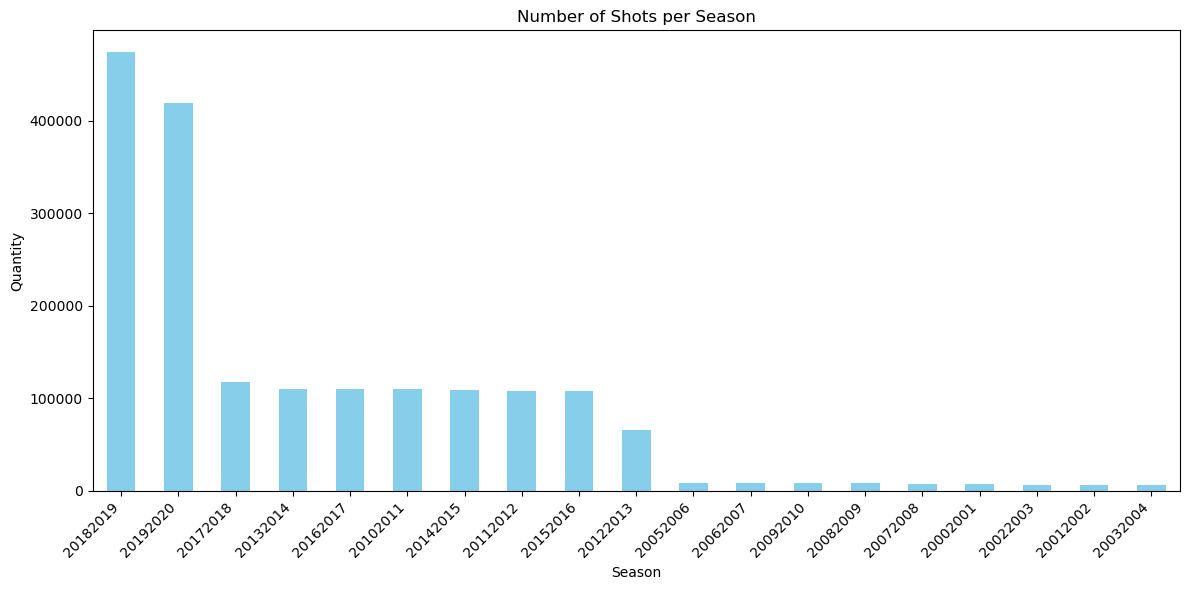

In [12]:
# Count the frequency of each event
shots_season = shots['season'].value_counts()
plot_amount_event(shots_season, 'Number of Shots per Season', 'Season', 'Quantity')

In [13]:
# seems that at season 2010-2011 and 2018-2019 there were significant more shots tracked than previously => why/ what changed?
shots_test = shots[shots['season'].isin([20102011])]
#display(shots_test)

shots_new = shots[shots['season'].isin([20192020])]
#display(shots_new)

# in newwer seasons an event is tracked multiple times => dropp duplicates
shots.drop_duplicates(subset=['play_id'], inplace=True)

C:\Users\kran\AppData\Local\Temp\ipykernel_22276\2943231625.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots.drop_duplicates(subset=['play_id'], inplace=True)


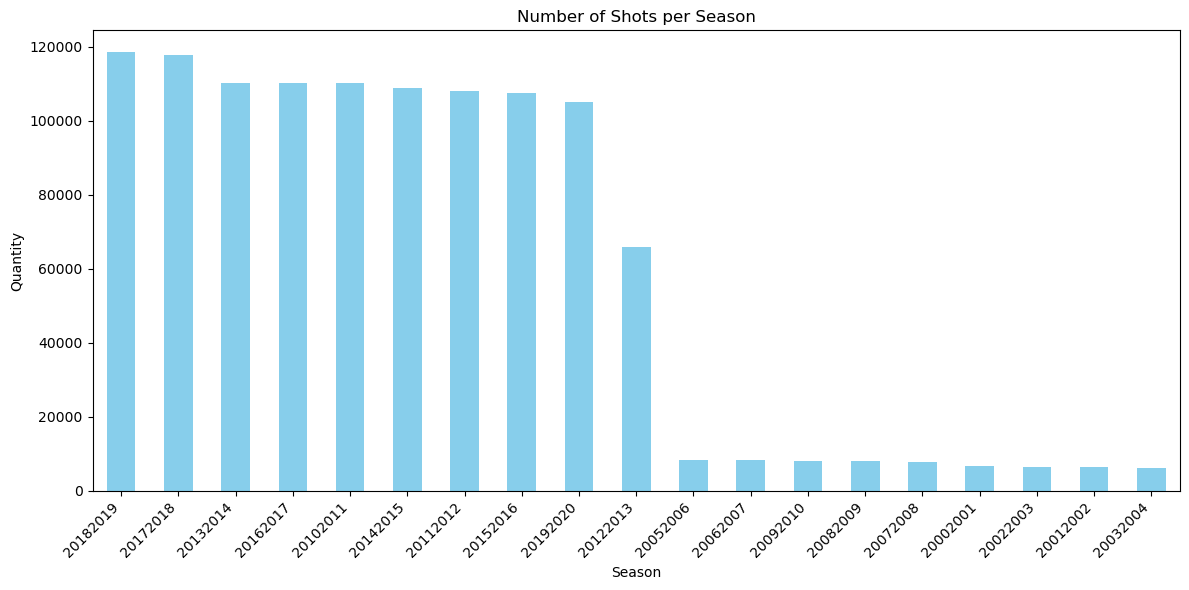

In [14]:
shots_season = shots['season'].value_counts()
plot_amount_event(shots_season, 'Number of Shots per Season', 'Season', 'Quantity')

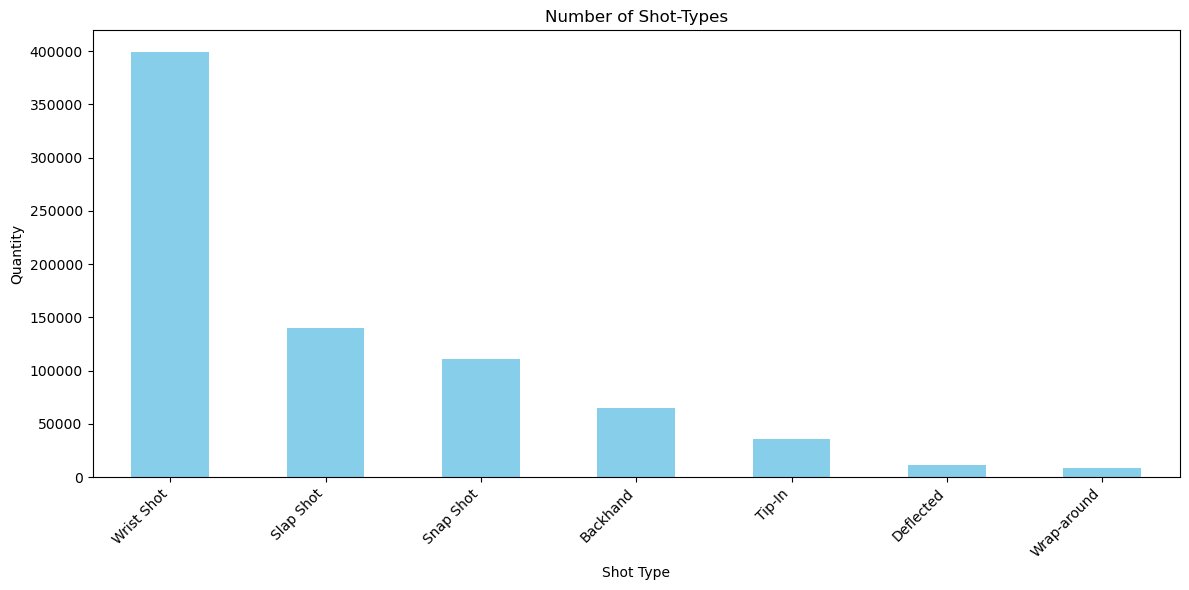

In [16]:
# Count the frequency of each shot type
shot_types = shots['secondaryType'].value_counts()
plot_amount_event(shot_types, 'Number of Shot-Types', 'Shot Type', 'Quantity')